**Dataset Download and Extraction**


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
#!/bin/bash
!kaggle datasets download mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
  0% 0.00/66.0M [00:00<?, ?B/s]
100% 66.0M/66.0M [00:00<00:00, 2.12GB/s]


We use the Kaggle API to download the Credit Card Fraud Detection dataset. The dataset is provided in a compressed .zip file, so we unzip it to access the CSV file.

In [3]:
import zipfile

with zipfile.ZipFile('/content/creditcardfraud.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')  # or 'content/' based on your platform

**Importing Libraries**

In [37]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report
from sklearn.metrics import classification_report, confusion_matrix
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score


**Reading the Dataset**

In [5]:
df=pd.read_csv('/content/creditcard.csv')

In [6]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
235193,148289.0,-0.904330,-0.767303,1.107214,-1.884635,-0.556156,-0.946967,-1.044826,0.509315,-0.486854,...,0.499423,1.055604,0.127967,0.009655,-1.166658,-0.513168,0.154215,0.060969,15.00,0
197441,132018.0,-1.105869,1.395273,0.575088,-1.283397,1.150782,-0.471698,2.007152,-1.296678,1.710454,...,-0.665686,-0.833545,-0.262680,-0.701547,0.116774,0.097400,-0.757569,-0.797246,17.02,0
196445,131512.0,-0.974966,1.110190,0.193460,-2.635929,0.670230,-0.759960,0.860737,0.380987,-0.508436,...,-0.173387,-0.593201,-0.052232,0.737148,-0.065977,0.320069,0.102952,0.100057,1.00,0
123813,77075.0,-0.467932,1.241241,1.346080,-0.029166,0.117132,-0.947342,0.942750,-0.297730,-0.090782,...,-0.344425,-0.667512,-0.045725,0.336428,-0.128942,0.047450,0.192963,-0.066693,8.90,0
4797,4276.0,-2.536796,-1.093282,2.826740,1.117317,0.705051,-0.266838,-0.099354,-0.084594,1.033094,...,-0.130864,0.196939,-0.085057,0.346269,0.223899,0.825618,-0.413828,0.109833,144.14,0
107982,70703.0,1.230049,-0.156394,0.180733,-0.119010,-0.315683,-0.134725,-0.320199,0.146761,0.174476,...,0.104707,0.295585,-0.078716,-0.242215,0.303578,1.151317,-0.077094,-0.018445,2.92,0
181439,124973.0,-0.076355,0.536324,0.266222,-0.546938,-0.061743,-0.044964,-0.208108,0.487463,0.353722,...,0.328300,0.972050,0.025150,0.553081,-0.666679,0.461973,-0.050401,-0.010450,11.53,0
254494,156756.0,-0.218891,1.125687,0.241823,-0.457751,1.052389,-0.294129,1.000240,-0.010928,-0.818275,...,-0.204670,-0.551086,-0.052090,0.630946,-0.493476,0.187953,0.102188,0.171807,1.79,0
22438,32246.0,-1.822104,0.600182,0.787887,-0.640557,0.802195,-0.134095,0.734398,0.160318,-0.117400,...,-0.038796,0.358299,0.326353,-0.302895,-0.004657,0.239924,0.183890,0.144746,11.64,0
98820,66833.0,-0.565805,0.967644,1.917657,0.706056,-0.033177,-0.082566,0.661310,0.015474,-0.212505,...,-0.114701,-0.150203,-0.037327,0.399591,-0.059460,-0.592141,-0.013195,0.065681,19.99,0


**Exploratory Data Analysis (EDA)**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Dropping the Time Column**


The Time column represents the seconds elapsed between transactions. Since it does not contribute much predictive power and can introduce noise, we drop it from the dataset.

In [9]:
df.drop('Time',axis=1, inplace=True)

**Train-Test Split**

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Class'], axis=1), df['Class'], test_size=0.2, random_state=42)

In [11]:
X_train.shape

(227845, 29)

**Profile Report**

We generate a profiling report (using pandas_profiling) to get a detailed summary of the dataset including distributions, correlations, and anomalies.

In [ ]:
%pip install ydata-profiling
from ydata_profiling import ProfileReport

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=27e29bc80e64965bc210026000071a07a45ce47aa807d44fae1cdeacee545520
  Stored in directory: /root/.cache/pip/wheels/5f/d4/d7/4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
     

In [ ]:
 profile = ProfileReport(df, title="Credit Card Fraud Profiling Report", explorative=True)
 profile.to_file("creditcard_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 30/30 [00:15<00:00,  2.00it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Isolation Forest**

We apply Isolation Forest as an unsupervised anomaly detection technique to identify potential fraudulent transactions. We check metrics like contamination and anomaly scores.

In [12]:
iso=IsolationForest(contamination=0.002)
predictions=iso.fit_predict(X_train)

In [13]:
test_predictions = iso.predict(X_test)

In [14]:
X_test['isoforest'] = test_predictions

In [15]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,isoforest
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,-1
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,1
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,1
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,1
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75723,-1.994348,1.503076,-0.365560,0.780223,-0.957956,0.038648,-0.453702,1.553565,-0.561964,-0.100318,...,0.224820,0.319275,-0.081356,-0.366704,-0.269380,-0.278170,0.082042,-0.015071,75.69,1
252263,-0.234567,0.733694,0.486250,-0.718186,0.782227,-0.788837,1.056307,-0.175016,-0.244864,-0.708527,...,-0.202040,-0.574857,-0.024845,-0.428558,-0.563551,0.159926,0.094924,0.163736,9.99,1
221246,0.040441,-0.109737,-1.266430,1.004783,2.223390,-0.670372,0.490662,-0.033739,-0.307052,0.402303,...,0.341151,0.930041,0.162391,-1.180279,-1.484172,-0.619133,0.357845,0.354379,7.63,1
81910,-0.495048,0.991481,1.671584,-0.342474,0.470012,-0.348503,0.996077,-0.351891,-0.219231,0.579396,...,-0.324995,-0.474178,-0.145562,-0.011279,-0.162997,0.020511,0.040529,-0.269775,3.59,1


In [16]:
X_train['isoforest']=predictions

In [17]:
X_train.sample(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,isoforest
265616,2.095037,-1.175449,-1.520765,-0.918477,-0.481096,-0.488949,-0.525732,-0.273566,-0.063873,0.759856,...,0.565300,1.580267,-0.318744,-0.901549,0.403101,0.302833,-0.034751,-0.058508,104.40,1
160458,1.875159,-0.547361,-0.731501,0.135716,-0.134423,0.381805,-0.523608,0.162640,1.005751,-0.036755,...,-0.135191,-0.438737,0.259052,0.055034,-0.369332,-0.643939,0.015336,-0.028760,69.97,1
208485,1.972054,0.543761,-3.213745,1.381475,1.368908,-0.581243,0.264215,-0.007885,0.263909,-0.940036,...,0.022466,0.018804,-0.248338,-1.809598,0.370144,-0.350443,0.022192,0.005959,42.99,1
22601,0.915791,0.141763,0.799492,2.716494,-0.176265,0.323259,0.096812,0.050232,-0.446259,0.408488,...,-0.175980,-0.547948,0.001320,0.088039,0.320625,-0.145635,0.010520,0.042104,107.06,1
201955,1.903241,-0.220658,0.173778,1.364085,-0.734117,-0.172325,-0.685274,0.037401,1.068620,0.112547,...,0.068715,0.390752,0.257803,-0.107164,-0.323542,-0.751043,0.084469,-0.017692,17.00,1
284312,-0.684568,0.850294,0.079568,-0.655694,0.378744,-0.954188,0.765508,0.138760,-0.128986,-0.144661,...,-0.117479,-0.144045,0.219855,0.059641,-0.883461,0.099047,-0.018184,-0.044669,3.79,1
273083,2.064427,-0.678267,-1.182544,-0.294405,-0.523526,-1.078600,-0.026953,-0.457781,-0.677000,0.780291,...,-0.566120,-1.055463,0.291850,-0.003475,-0.294199,0.382397,-0.058117,-0.047036,64.80,1
258563,1.811065,-0.761645,-0.222921,0.473860,-0.998704,-0.333403,-0.721153,0.109515,1.115139,0.170506,...,0.249581,0.720869,0.116065,0.117001,-0.375651,0.538974,-0.040413,-0.046265,74.99,1
70998,-0.421514,1.029691,1.469883,0.146409,-0.128618,-0.841758,0.578926,0.085911,-0.289764,-0.527819,...,-0.212538,-0.555417,0.090637,0.528966,-0.337106,0.071839,0.256746,0.098170,2.69,1
206,0.753308,-1.131593,0.878730,0.297871,-1.327250,0.066596,-0.535276,0.171133,1.184602,-0.510453,...,0.031912,-0.213298,-0.091660,0.151837,-0.067673,0.999073,-0.063985,0.049174,226.07,1


**Feature Scaling**

Since the Amount column is not scaled (unlike the PCA-transformed features), we apply RobustScaler to normalize it while reducing the effect of outliers.

In [18]:
scaler=RobustScaler()
X_train[['Amount']]=scaler.fit_transform(X_train[['Amount']])
X_test[['Amount']]=scaler.transform(X_test[['Amount']])

In [19]:
X_train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,isoforest
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,0.000916,-0.000384,-0.000920,-0.001458,0.000997,-0.000613,0.001090,-0.000383,0.000961,-0.001250,...,0.000215,-0.001215,0.000175,-0.000217,-0.000979,-0.000192,-0.000032,0.000257,0.929790,0.995997
std,1.958337,1.656602,1.514545,1.415853,1.387667,1.336803,1.243493,1.188643,1.097553,1.086659,...,0.732617,0.725311,0.627103,0.605446,0.521764,0.482443,0.401821,0.329776,3.565458,0.089384
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,-0.307692,-1.000000
25%,-0.919918,-0.597971,-0.890786,-0.849270,-0.688802,-0.768573,-0.552156,-0.208431,-0.642386,-0.536120,...,-0.228730,-0.542809,-0.161296,-0.354887,-0.317835,-0.327476,-0.070960,-0.052980,-0.229371,1.000000
50%,0.017978,0.066050,0.179041,-0.020959,-0.054711,-0.274846,0.041272,0.022233,-0.050414,-0.094026,...,-0.029639,0.005491,-0.010595,0.040766,0.015101,-0.052011,0.001359,0.011366,0.000000,1.000000
75%,1.315548,0.803898,1.025399,0.741630,0.611173,0.396056,0.570639,0.327504,0.599040,0.450669,...,0.186080,0.527408,0.148202,0.439790,0.350453,0.240813,0.091400,0.078464,0.770629,1.000000
max,2.454930,22.057729,4.187811,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,15.245686,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,359.009231,1.000000


**Random Classifier (Baseline Model)**

In [ ]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)

We first try a Random Classifier as a baseline.

The results are poor because fraud detection requires more sophisticated models due to class imbalance.

This highlights the need for stronger models.

In [ ]:


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

[[56863     1]
 [   21    77]]
              precision    recall  f1-score   support

           0     0.9996    1.0000    0.9998     56864
           1     0.9872    0.7857    0.8750        98

    accuracy                         0.9996     56962
   macro avg     0.9934    0.8928    0.9374     56962
weighted avg     0.9996    0.9996    0.9996     56962



**XGBoost Classifier**

We switch to XGBoost, a powerful gradient boosting algorithm.

Trained the model and evaluated performance.

Achieved much better results compared to the random classifier.

In [22]:
xgb_clf = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=len(y_train[y_train == 0]) / len(y_train[y_train == 1]), # handle imbalance
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"   # needed to suppress warnings
)

In [23]:
xgb_clf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:59:08] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [24]:
y_pred1 = xgb_clf.predict(X_test)
y=pd.DataFrame(y_pred1)
print(y.value_counts())

0
0    56877
1       85
Name: count, dtype: int64


**Key Point:**
Precision may drop a bit, but recall is more important in fraud detection.
Missing a fraud (false negative) is worse than wrongly flagging a genuine transaction (false positive).

In [25]:


print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1, digits=4))


[[56860     4]
 [   17    81]]
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9529    0.8265    0.8852        98

    accuracy                         0.9996     56962
   macro avg     0.9763    0.9132    0.9425     56962
weighted avg     0.9996    0.9996    0.9996     56962



**Hyperparameter Tuning with GridSearchCV**

Tried tuning with GridSearchCV.

Observation: Increasing recall often reduced precision drastically.

For fraud, we still prefer higher recall, even at the cost of precision.

In [ ]:

param_grids={
    'n_estimators':[100,200,300,400,500],
    'max_depth':[3,5,7,9,10],
    'learning_rate':[0.01,0.1,0.2],
}

In [ ]:
cf=RandomizedSearchCV(estimator=xgb_clf,param_distributions=param_grids,n_iter=10,cv=5,scoring='f1',verbose=2,random_state=42,n_jobs=-1)

In [ ]:
cf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [06:16:41] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.8, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_const...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=5,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=300, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
y_pred2 = cf.predict(X_test)
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2, digits=4))

[[56861     3]
 [   18    80]]
              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9639    0.8163    0.8840        98

    accuracy                         0.9996     56962
   macro avg     0.9818    0.9081    0.9419     56962
weighted avg     0.9996    0.9996    0.9996     56962



**ROC Curve**

Plot ROC curve and compute AUC.

Shows how well the model separates fraud vs. non-fraud.

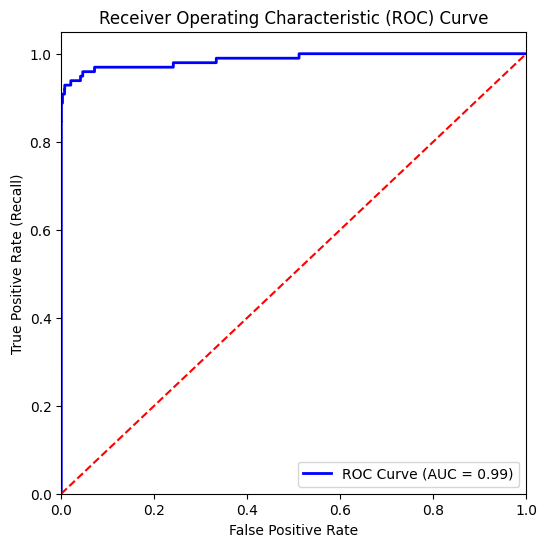

In [ ]:


# Predict probabilities
y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]  # probability of fraud (class 1)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')  # random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


**Precision-Recall Curve**

Plot Precision-Recall curve.

More informative for imbalanced datasets.

Area under PR curve (AP) shows trade-off:

Higher recall = better fraud detection.

Some precision loss is acceptable.

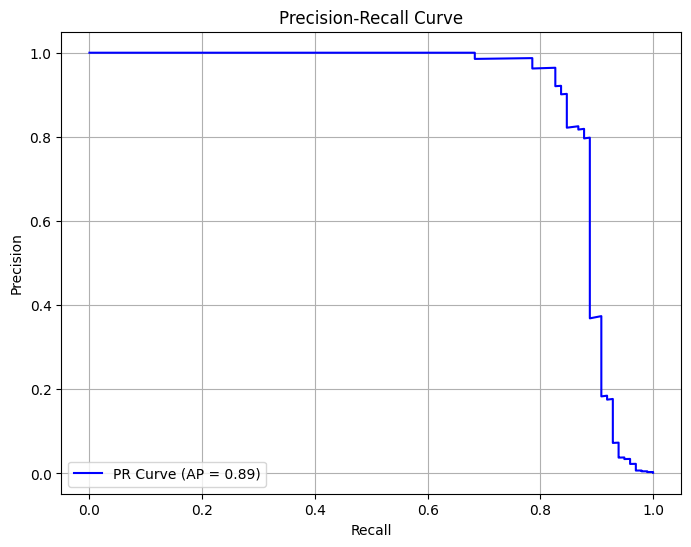

In [ ]:

# y_test = true labels
# y_pred_prob = predicted probabilities (model.predict_proba(X_test)[:, 1])

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='blue', label='PR Curve (AP = {:.2f})'.format(avg_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()


**Final Notes**

Fraud detection is a recall-first problem.

Best model found: XGBoost with tuned parameters.

Next step (future work): Deploy as a Streamlit/Flask app where users can input transaction details and check fraud probability.

precision-:0.9529
recall-:0.8265

In [26]:
import joblib
joblib.dump(xgb_clf, "fraud_detection_model.pkl")


['fraud_detection_model.pkl']

In [28]:
model = joblib.load("fraud_detection_model.pkl")
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [38]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("sklearn",sklearn.__version__)
print("xgboost",xgb.__version__)
print("matplotlib",matplotlib.__version__)

numpy 2.0.2
pandas 2.2.2
sklearn 1.6.1
xgboost 3.0.4
matplotlib 3.10.0


In [33]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(xgb_clf, f)